In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:\AI_study\S006.csv")
df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,6
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,6
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,6
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,6
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,6
...,...,...,...,...,...,...,...,...
408704,2019-01-12 01:09:32.880,-0.690417,0.035710,-0.697054,0.228261,0.072950,0.985175,7
408705,2019-01-12 01:09:32.890,-0.745270,0.032438,-0.681320,-0.121986,0.063700,1.026665,7
408706,2019-01-12 01:09:32.900,-0.684827,0.037622,-0.703884,0.302960,0.076986,0.978313,7
408707,2019-01-12 01:09:32.910,-0.751518,0.028819,-0.668037,-0.241803,0.056675,1.026166,7


In [2]:
# 결측치 확인

df.isnull().sum()

timestamp    0
back_x       0
back_y       0
back_z       0
thigh_x      0
thigh_y      0
thigh_z      0
label        0
dtype: int64

Text(0.5, 1.0, 'Distribution of Hearth Disease Levels')

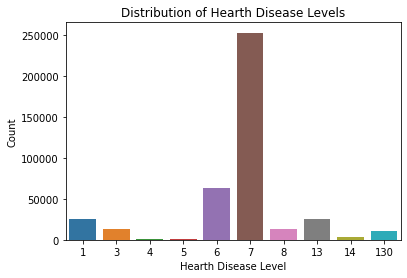

In [3]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="label")
plt.xlabel('Hearth Disease Level')
plt.ylabel("Count")
plt.title('Distribution of Hearth Disease Levels')

In [4]:
df['label'].value_counts()

7      253029
6       62682
13      25040
1       24889
8       13036
3       12693
130     11290
14       3130
5        1550
4        1370
Name: label, dtype: int64

Text(0.5, 1.0, 'Distribution of Hearth Disease Levels')

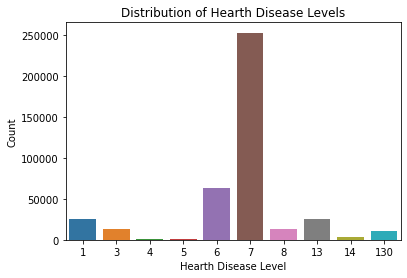

In [5]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="label")
plt.xlabel('Hearth Disease Level')
plt.ylabel("Count")
plt.title('Distribution of Hearth Disease Levels')

In [6]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label = LabelEncoder()
df['label'] = label.fit_transform(df['label'])
df.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,4
1,2019-01-12 00:00:00.010,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,4
2,2019-01-12 00:00:00.020,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,4
3,2019-01-12 00:00:00.030,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,4
4,2019-01-12 00:00:00.040,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,4


In [7]:
df['label'].value_counts()

5    253029
4     62682
7     25040
0     24889
6     13036
1     12693
9     11290
8      3130
3      1550
2      1370
Name: label, dtype: int64

In [8]:
df=df.drop('timestamp',axis=1)
df.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439,4
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309,4
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212,4
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140,4
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782,4


In [9]:
'''
df0 = df[df['label']==0].head(13000).copy()
df1 = df[df['label']==1].copy()
df2 = df[df['label']==2].copy()
df3 = df[df['label']==3].copy()
df4 = df[df['label']==4].head(13000).copy()
df5 = df[df['label']==5].head(13000).copy()
df6 = df[df['label']==6].copy()
df7 = df[df['label']==7].head(13000).copy()
df8 = df[df['label']==8].copy()
df9 = df[df['label']==9].copy()
'''

"\ndf0 = df[df['label']==0].head(13000).copy()\ndf1 = df[df['label']==1].copy()\ndf2 = df[df['label']==2].copy()\ndf3 = df[df['label']==3].copy()\ndf4 = df[df['label']==4].head(13000).copy()\ndf5 = df[df['label']==5].head(13000).copy()\ndf6 = df[df['label']==6].copy()\ndf7 = df[df['label']==7].head(13000).copy()\ndf8 = df[df['label']==8].copy()\ndf9 = df[df['label']==9].copy()\n"

In [10]:
'''
import pandas as pd

balanced_data = pd.DataFrame()
balanced_data = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9])
balanced_data.shape
'''

'\nimport pandas as pd\n\nbalanced_data = pd.DataFrame()\nbalanced_data = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9])\nbalanced_data.shape\n'

In [11]:
'''
X=balanced_data.drop('label',axis=1)
X.head()
'''

"\nX=balanced_data.drop('label',axis=1)\nX.head()\n"

In [12]:
#SMOTE를 사용한 경우
X=df.drop('label',axis=1)
X.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z
0,-0.760242,0.299570,0.468570,-5.092732,-0.298644,0.709439
1,-0.530138,0.281880,0.319987,0.900547,0.286944,0.340309
2,-1.170922,0.186353,-0.167010,-0.035442,-0.078423,-0.515212
3,-0.648772,0.016579,-0.054284,-1.554248,-0.950978,-0.221140
4,-0.355071,-0.051831,-0.113419,-0.547471,0.140903,-0.653782


In [13]:
'''
y=balanced_data['label']
y.value_counts()
'''

"\ny=balanced_data['label']\ny.value_counts()\n"

In [14]:
# SMOTE 사용한 경우
y=df['label']
y.value_counts()

5    253029
4     62682
7     25040
0     24889
6     13036
1     12693
9     11290
8      3130
3      1550
2      1370
Name: label, dtype: int64

In [15]:
# SMOTE를 사용해 데이터 불균형 해소
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_new, y_new = smt.fit_resample(X, y)

In [16]:
y_new.value_counts()

9    253029
8    253029
7    253029
6    253029
5    253029
4    253029
3    253029
2    253029
1    253029
0    253029
Name: label, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new,test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 21)

In [18]:
'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 21)
'''

'from sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,\n                                                    shuffle = True,\n                                                    random_state = 21)\n'

In [19]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [20]:
# Merge train and test X/y data to apply sequence transformation function
y_train_array = np.array(y_train)
train_set = np.c_[X_train, y_train_array]

y_test_array = np.array(y_test)
test_set = np.c_[X_test, y_test_array]

# Apply sequence transformation using time step of 25 for both train and test data
# All sensing modalities are recorded at a sampling rate of 50 Hz, which is considered sufficient for capturing human activity.

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)

(2024228, 5, 6) (2024228,)
(506054, 5, 6) (506054,)


In [21]:
y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values

print(y_train_onehot.shape)
print(y_test_onehot.shape)

(2024228, 10)
(506054, 10)


In [22]:
print(X_train.shape)

(2024228, 5, 6)


In [23]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_onehot.shape[1]

In [24]:
# define model

from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Input
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Input, Conv1D, Flatten, Dense, LSTM, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, MaxPooling1D, TimeDistributed, LSTM, BatchNormalization, Input, concatenate, Conv1D
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv1D(filters=64,
                 kernel_size=3, activation='relu',
                 input_shape=(n_timesteps, n_features),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=128,
                 kernel_size=3, activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(filters=256,
                 kernel_size=3, activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100,
                activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 64)             1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 64)             256       
_________________________________________________________________
dropout (Dropout)            (None, 5, 64)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 128)            24704     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 128)            512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 128)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 256)            9

In [25]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [26]:
train_epochs = 30
history = model.fit(X_train, y_train_onehot, epochs=train_epochs, verbose=True,
                    validation_split=0.1, callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/30
56932/56932 [==============================] - 694s 12ms/step - loss: 0.9799 - accuracy: 0.6224 - val_loss: 0.7573 - val_accuracy: 0.7105
Epoch 2/30
56932/56932 [==============================] - 779s 14ms/step - loss: 0.8625 - accuracy: 0.6741 - val_loss: 0.7195 - val_accuracy: 0.7263
Epoch 3/30
56932/56932 [==============================] - 760s 13ms/step - loss: 0.8323 - accuracy: 0.6863 - val_loss: 0.6875 - val_accuracy: 0.7392
Epoch 4/30
56932/56932 [==============================] - 758s 13ms/step - loss: 0.8113 - accuracy: 0.6937 - val_loss: 0.6765 - val_accuracy: 0.7408
Epoch 5/30
56932/56932 [==============================] - 659s 12ms/step - loss: 0.7956 - accuracy: 0.6998 - val_loss: 0.6614 - val_accuracy: 0.7466
Epoch 6/30
56932/56932 [==============================] - 781s 14ms/step - loss: 0.7843 - accuracy: 0.7036 - val_loss: 0.6571 - val_accuracy: 0.7463
Epoch 7/30
56932/56932 [==============================] - 793s 14ms/step - loss: 0.7754 - accuracy: 0.7069

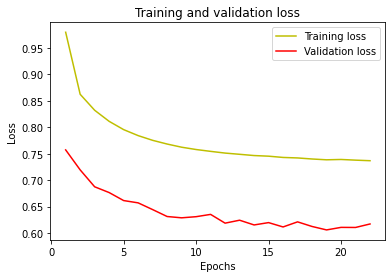

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

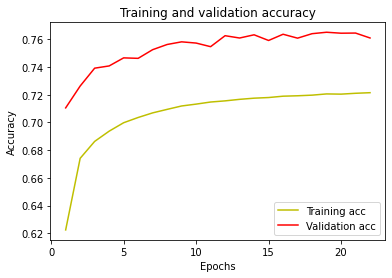

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test_onehot,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [30]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.45      0.55     50577
           1       0.58      0.64      0.60     50475
           2       0.78      0.88      0.82     50576
           3       0.87      0.90      0.88     50346
           4       0.77      0.80      0.78     50662
           5       0.99      0.99      0.99     50582
           6       1.00      0.99      1.00     50832
           7       0.56      0.68      0.61     50687
           8       0.75      0.67      0.71     50655
           9       0.70      0.66      0.68     50662

    accuracy                           0.77    506054
   macro avg       0.77      0.77      0.76    506054
weighted avg       0.77      0.77      0.76    506054

[[22730 12296  5539  4161  2661    89    22  1412   902   765]
 [ 5185 32177  1499  1149  8776     4     2   402   516   765]
 [  936  1910 44339   817   150     0     0  1425   403   596]
 [ 2297   700  1745 45214   180     4     0   134   